In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from IPython.display import display, clear_output

from iarchitect import envs,trainer as trainer_iarch
from iarchitect.agents import dqn as dqn_iarch
from iarchitect.common import show_policy_behaviour
from tf_agents.agents import DdpgAgent,DqnAgent

from tf_agents.utils import common
from tf_agents import networks
from tf_agents.networks import sequential
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.metrics import py_metrics,tf_metrics
from tf_agents.drivers import py_driver,dynamic_episode_driver,dynamic_step_driver
from tf_agents.policies import random_py_policy,random_tf_policy,PyTFEagerPolicy
from tf_agents.replay_buffers import tf_uniform_replay_buffer,py_uniform_replay_buffer

from tensorflow import Tensor,Variable
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras import initializers


# Utils

## Behavior

In [15]:
def show_agent_behavior(agent,ax,ax2):
    results = show_policy_behaviour(train_env,trainer.agent.policy,50)
    ax.plot([r[0] for r in results],label="action")
    ax.plot([r[1] for r in results],label="reward")
    ax2.imshow(np.vstack([r[2] for r in results]))

## Plot

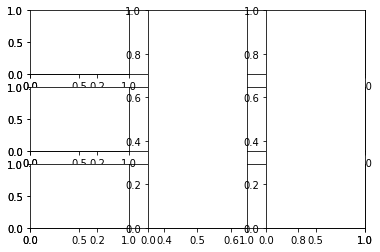

In [13]:
fig,axes = plt.subplots(3,1)
gs = GridSpec(3, 3)
ax = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[:,1])
ax5 = fig.add_subplot(gs[:,2])

def update_plot(step,trainer):
    ax.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax.plot(trainer.metrics,label="metric",color="green")
    ax2.plot(trainer.losses,label="loss",color="red")
    trainer.observer.plot_reward(ax=ax3,slice_=slice(-50,None,None))
    show_agent_behavior(agent,ax4,ax5)
    ax.legend()
    ax2.legend()
    clear_output(wait = True)
    display(fig)

# Examples

## AlignedRows 4

In [9]:
environment = envs.AlignedRowEnv(4,action_float=False,
                            fail_on_same=True,
                           rewards = {
                     "already_filled":-10,
                     "max_iter":-10,
                     "new_value":1,
                     "success":10
                 })
utils.validate_py_environment(environment, episodes=5)
train_env = tf_py_environment.TFPyEnvironment(environment)

In [10]:
network = dqn_iarch.network_factory((20,20),environment.dimension)
agent = dqn_iarch.agent_factory(
    train_env,
    network=network,
    learning_rate=0.001)

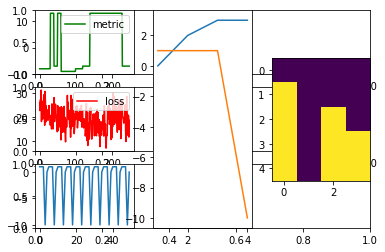

KeyboardInterrupt: 

In [18]:
trainer = trainer_iarch.Trainer(train_env,agent)
trainer.run(callbacks=[update_plot],
            num_steps_collect_driver=640,
            sample_batch_size_experience = 64,
            num_iterations_train = 10
           )